<a href="https://colab.research.google.com/github/aypy01/tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


##Loading Dataset

In [ ]:
#Loading Dataset
fashion_MNIST= tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_MNIST.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Inspecting Dataset

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
y_train.shape


(60000,)

In [ ]:
y_train
#Label y_train only return the 0-9 array and the dataset have to be text dictioctionary after seeing the documentation


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:

class_names=["T-shirt/Top",'Trouser','Pullover','Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']


##Preprocessing

###Rescaling

In [ ]:
x_train=x_train/255.0 #converting the range from 255 to 0-1
#Similarly for x_test
x_test=x_test/255.0


###Matplotlib

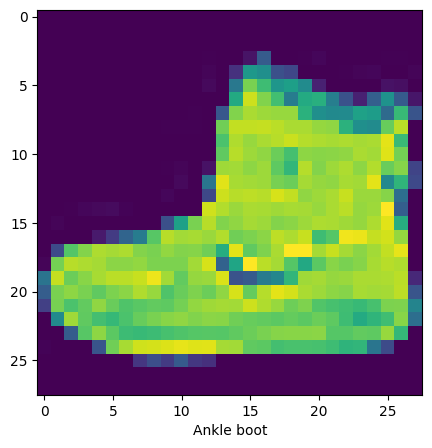

In [ ]:
#1st let's see what's inside in this dataset
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.xlabel(class_names[y_train[0]])
plt.show()

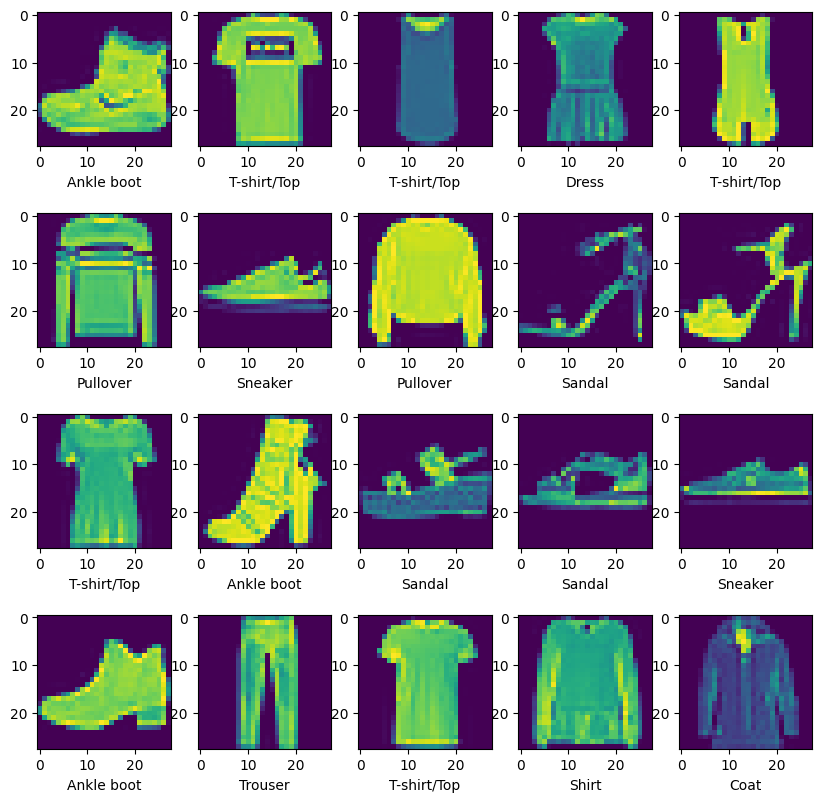

In [ ]:
#Lets see what that 20 colomn of x_train have

plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xlabel(class_names[y_train[i]]) #
  plt.imshow(x_train[i])
plt.show()


##Model

In [ ]:
from tensorflow.keras import models,layers
model=models.Sequential([
    layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)), #As Conv2D taked 3-D input and not 2-D so , have to mention 1
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Compile

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',#As the labels are multiple and 0-9
              metrics=['accuracy'])


##Training

In [ ]:

model.fit(x_train,y_train,epochs=10,validation_split=0.2,verbose=1, shuffle=True)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7979 - loss: 0.5581 - val_accuracy: 0.8886 - val_loss: 0.3629
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8961 - loss: 0.2851 - val_accuracy: 0.9044 - val_loss: 0.2931
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9148 - loss: 0.2298 - val_accuracy: 0.9043 - val_loss: 0.2811
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9284 - loss: 0.1951 - val_accuracy: 0.9172 - val_loss: 0.2371
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9337 - loss: 0.1784 - val_accuracy: 0.9214 - val_loss: 0.2147
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9479 - loss: 0.1420 - val_accuracy: 0.9207 - val_loss: 0.2195
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9517 - loss: 0.1285 - val_accuracy: 0.9240 - val_loss: 0.2159
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9585 - loss: 0.111

##Evaluate

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print(f'Accuracy:{accuracy: .3f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9249 - loss: 0.2325
Accuracy: 0.926


##Predict

In [ ]:
prediction=model.predict(x_test)

prediction[1] #See the class index 2 have the maximum confidence of test set index 1 image


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.9113947e-04, 1.4438204e-11, 9.9970645e-01, 1.4782396e-08,
       6.0132209e-08, 4.2537922e-12, 2.3208361e-06, 8.1897593e-11,
       2.1969386e-09, 4.6622341e-13], dtype=float32)

In [ ]:
np.argmax(prediction[1]) #As seen the pediction return the confidence array from each class


np.int64(2)

In [ ]:
#Lets check what label is test[1]  is
y_test[1]
#It checks ouw we are predicting correct

np.uint8(2)

##Saving

In [ ]:
model.save('fashion_MNIST.')


##Summary:
### Dataset
- Loaded FashionMNIST from `tf.keras.datasets`.
- 10 classes (T-shirt/top, Trouser, Pullover, Dress, etc.).
- Images are grayscale, 28×28 pixels.
- Rescaled pixel values to [0,1].

### Preprocessing
- Used matplotlib to visualize sample images.
- Created a class label list for easier interpretation.

### Model
- CNN architecture:
  - Conv2D layers with ReLU.
  - MaxPooling2D + Dropout for regularization.
  - Flatten to feed into Dense layers.
  - Dense hidden layers with ReLU.
  - Output: Dense(10, activation='softmax') for classification.
- Loss: `SparseCategoricalCrossentropy`.
- Optimizer: Adam.
- Metric: Accuracy.

### Training & Evaluation
- Fit model with 10 epochs, validation split 0.2, shuffle=True.
- Achieved ~92.6% accuracy on test set.
- Predictions output probability distribution across 10 classes.
- Verified correctness by comparing predicted label with true label.
- Saved final model as `fashion_mnist.keras`.



---
## Navigation

###  Explore More Projects
[![Project: Sentiments](https://img.shields.io/badge/Project-Sentiments-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/sentiments.ipynb)

[![Project: Fashion MNIST](https://img.shields.io/badge/Project-Fashion_MNIST-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/fashion-mnist-image-classifier.py)

---

## Author
 <p align="left">
  Created and maintained by &nbsp;
  <a href="https://github.com/aypy01" target="_blank">
  <img src="https://img.shields.io/badge/Aaditya_Yadav-aypy01-e6770b?style=flat-square&logo=github&logoColor=00FF80&labelColor=765898" alt="GitHub Badge"/>
</a>

</p>

<p>
<img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&background=765898&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>


## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).
